Source:

https://towardsdatascience.com/machine-learning-text-processing-1d5a2d638958

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import nltk
from nltk.corpus import stopwords
import string
import re
import warnings
warnings.filterwarnings("ignore")
import os
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score,precision_score, balanced_accuracy_score,f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report, jaccard_score
# from sklearn.metrics import plot_confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

### Check out the ata


In [114]:
df= pd.read_csv('Twitter_Emotion_Dataset.csv')
df.head(5)
len(df)

4401

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4401 entries, 0 to 4400
Data columns (total 2 columns):
label    4401 non-null object
tweet    4401 non-null object
dtypes: object(2)
memory usage: 34.4+ KB


### Exploratory Data Analysis



Let's use groupby to use describe by Category, this way we can begin to think about the features that separate ham and spam!


In [116]:
df.groupby('label').describe()


tweet                                                               
        count unique                                                top freq
label                                                                       
anger    1101   1100  belajar agama yg tuntas jd nga ngarang dalam h...    2
fear      649    646  Aku gak salah bila mohon pd [USERNAME], segera...    2
happy    1017   1012  [USERNAME] Selamat Siang Sahabat Pos. Kiriman ...    4
love      637    636  Walaupun kita jauh secara fisik, kita tahu kit...    2
sadness   997    996  Turut sepenanggungan atas meninggalnya dr. Ram...    2

Let's make a new column to detect how long the text messages are

In [117]:
df['Length'] = df['tweet'].apply(len)
# df['label'].unique()
df.head()

,label,tweet,Length
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...",220
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi...",235
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...,116
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...",250
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata...",203


Let's see the percentage of ham and spam in our dataset

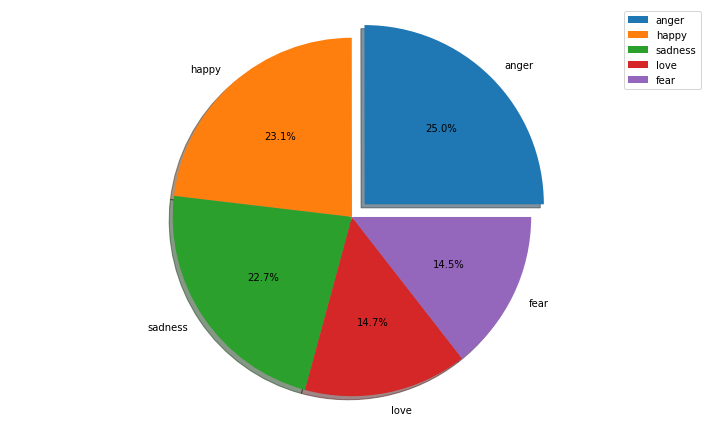

In [118]:
explode = (0.1,0,0,0,0)  
fig1, ax1 = plt.subplots(figsize=(10,6))
ax1.pie(df['label'].value_counts(), explode=explode,labels=['anger', 'happy', 'sadness', 'love', 'fear'], autopct='%1.1f%%',
        shadow=True)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

Text(0.5, 0, 'Length')

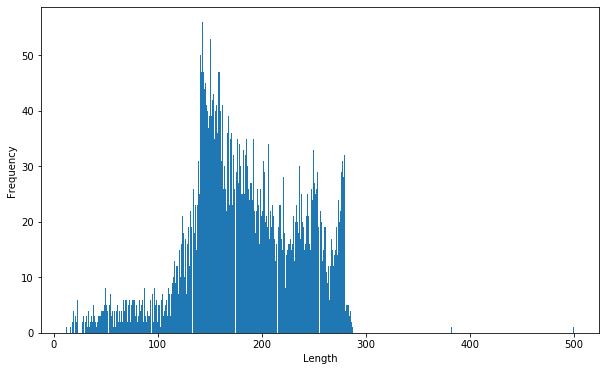

In [119]:
plt.figure(figsize=(10,6))
df['Length'].plot.hist(bins = 500)
plt.xlabel('Length')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x180B9BB0>,
      dtype=object)

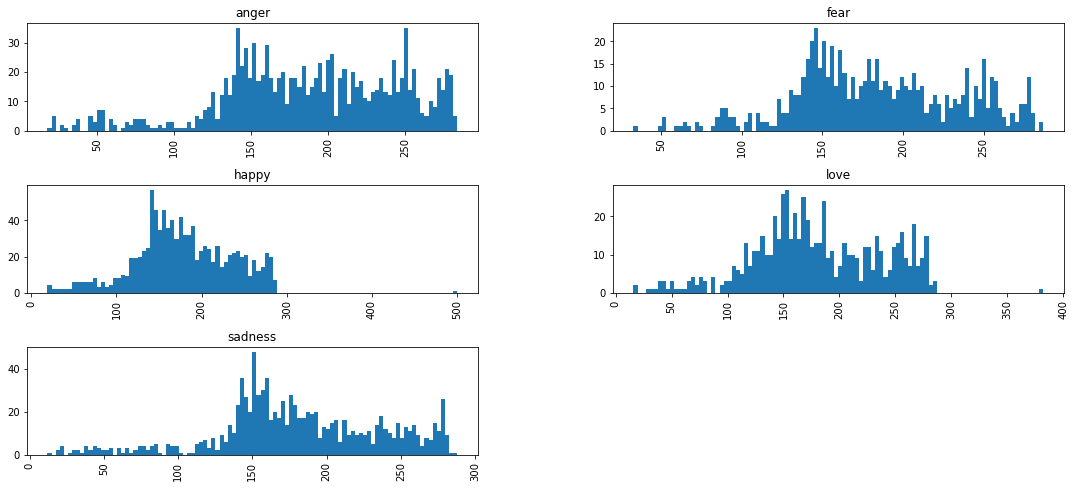

In [120]:
df.hist(column='Length',by='label',bins=100,figsize=(18,8))

One of the text has 910 characters, let's use masking to find this message:


In [121]:
df[df['Length']==500]['tweet'].iloc[0]

'Acara tahunan "Sanusi Family", ini lah wajah para anak, cucu, cucu menantu, dan cicit terempong. Smg thn berikutnya bs makin kompak dan lengkap #7-8juli2018 [URL]\nanger;Wkwkwkw Keknya dah seminggu lebih meledak2 mulu. Emang orang sekitar gue pada gblk atau emang gaada otaknya dari dulu cuma gue nya yg sabar\nsadness;sabar ya boy kamu slalu d hina tmanku pdhal kamu ndak salah apa"" kamu slalu d bipang manusia lastik tpikan kamu bukan manusia plastik. Kapan temanku tdak mrnghinamu boy hwaiting boy"'

### WordCloud

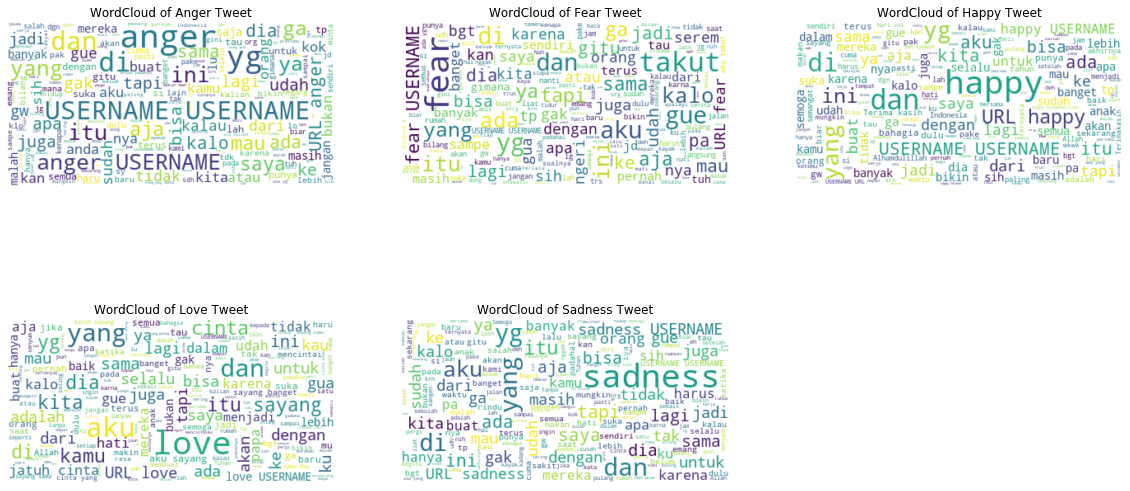

In [122]:
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
tweetAnger = open(path.join(d, 'dataTweetAnger.csv')).read()
tweetFear= open(path.join(d, 'dataTweetFear.csv')).read()
tweetHappy = open(path.join(d, 'dataTweetHappy.csv')).read()
tweetLove= open(path.join(d, 'dataTweetLove.csv')).read()
tweetSad= open(path.join(d, 'dataTweetsadness.csv')).read()

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt

# lower max_font_size
wordcloudAnger = WordCloud(max_font_size=40, background_color="white").generate(tweetAnger)
wordcloudFear= WordCloud(max_font_size=40, background_color="white").generate(tweetFear)
wordcloudHappy = WordCloud(max_font_size=40, background_color="white").generate(tweetHappy)
wordcloudLove= WordCloud(max_font_size=40, background_color="white").generate(tweetLove)
wordcloudSad= WordCloud(max_font_size=40, background_color="white").generate(tweetSad)

plt.figure(figsize=(20,10))
plt.subplot(231)
plt.imshow(wordcloudAnger, interpolation="bilinear")
plt.title('WordCloud of Anger Tweet')
plt.axis("off")

plt.subplot(232)
plt.imshow(wordcloudFear, interpolation="bilinear")
plt.title('WordCloud of Fear Tweet')
plt.axis("off")

plt.subplot(233)
plt.imshow(wordcloudHappy, interpolation="bilinear")
plt.title('WordCloud of Happy Tweet')
plt.axis("off")

plt.subplot(234)
plt.imshow(wordcloudLove, interpolation="bilinear")
plt.title('WordCloud of Love Tweet')
plt.axis("off")

plt.subplot(235)
plt.imshow(wordcloudSad, interpolation="bilinear")
plt.title('WordCloud of Sadness Tweet')
plt.axis("off")
plt.show()


### Text Cleaning

clean the text for the messages in dataset

============================

    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Handling lower/upper case
    4. Returns a list of the cleaned text



## Feature Extraction

In [129]:
semua=[]
description_list = []
for article in df["tweet"]:
    article = re.sub("[^a-zA-Z]"," ",article)
    article = article.lower()   # low case letter
    article = word_tokenize(article)
    article = " ".join(article)
    description_list.append(article) #we hide all word one section
    semua.append(description_list) 
    description_list=[]

df['tweet2']=pd.DataFrame(semua)
df.head()

,label,tweet,Length,tweet2
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...",220,soal jln jatibaru polisi tdk bs gertak gubernu...
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi...",235,sesama cewe lho kayaknya harusnya bisa lebih r...
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...,116,kepingin gudeg mbarek bu hj amad foto dari goo...
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...",250,jln jatibaru bagian dari wilayah tn abang peng...
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata...",203,sharing pengalaman aja kemarin jam batalin tik...


### Train Test Split

In [130]:
X = df['tweet2']
y = df['label']

In [138]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=881)
print(len(x_train), len(x_test), len(x_train) + len(x_test))

3520 881 4401


## Training a Model ##
I using **scikit-learn's** [pipeline](http://scikit-learn.org/stable/modules/pipeline.html) to store a pipeline of workflow. This will allow me to set up all the transformations that we will do to the data for future use.

The process of pipeline include:
- Using **CountVectorizer** to convert those tweet into a matrix of token counts.
- Using **TfidfTransformer** to measures how frequent a term occurs in a document and measures how important a term is.
- Last step of the pipeline is decide the machine learning for the classifier.

In [140]:
pipeline = Pipeline([
    ('cv',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [144]:
pipeline.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('cv',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [145]:
prediksi = pipeline.predict(x_test)

              precision    recall  f1-score   support

       anger       0.55      0.87      0.67       229
        fear       0.95      0.15      0.25       137
       happy       0.72      0.56      0.63       197
        love       0.91      0.30      0.45       130
     sadness       0.39      0.62      0.48       188

    accuracy                           0.55       881
   macro avg       0.70      0.50      0.50       881
weighted avg       0.67      0.55      0.52       881



Text(0.5, 15.0, 'Predicted label')

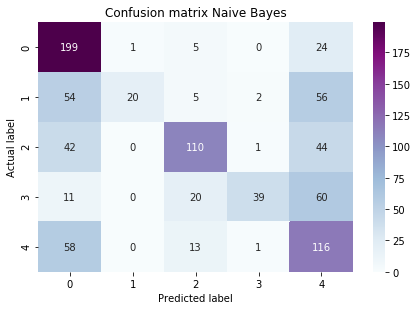

In [164]:
print(classification_report(y_test,prediksi))

cm = confusion_matrix(y_test,prediksi)
class_names=[0,1,2,3,4] # name  of classes


# fig, ax = plt.subplots()
# plt.figure(figsize=(15,10))
# plt.subplot(231)
tick_marks = [[0,1,2,3,4]]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# # create heatmap
sb.heatmap(pd.DataFrame(cm), annot=True, cmap="BuPu" ,fmt='g')
# ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Naive Bayes', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# print(confusion_matrix(y_test,prediksi))

## Improve Machine Learning Model ##
My assumptions is that **TfidfTransformer** make the model the worse than its hould be and now I am exclude the _Tfidf_ from the pipeline and trying to use other classifier model to see how each of the model works.

In [157]:
multinomial_pipeline = Pipeline([
    ('cv',CountVectorizer()),
    ('classifier',MultinomialNB())
])
RandomForest_pipeline = Pipeline([
    ('cv',CountVectorizer()),
    ('classifier',RandomForestClassifier(max_depth= 30, max_features= 'auto', n_estimators= 1000))
])
SVC_pipeline = Pipeline([
    ('cv',CountVectorizer()),
    ('classifier',SVC(C= 10, gamma= 0.1, kernel= 'rbf'))
])

In [159]:
multinomial_pipeline.fit(x_train,y_train)
RandomForest_pipeline.fit(x_train,y_train)
SVC_pipeline.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('cv',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('classifier',
                 SVC(C=10, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma=0.1, kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
        

In [167]:
multinomial_prediksi = multinomial_pipeline.predict(x_test)
RandomForest_prediksi = RandomForest_pipeline.predict(x_test)
SVC_prediksi = SVC_pipeline.predict(x_test)

### MultinomialNB ###

              precision    recall  f1-score   support

       anger       0.66      0.82      0.73       229
        fear       0.81      0.54      0.65       137
       happy       0.77      0.56      0.65       197
        love       0.69      0.69      0.69       130
     sadness       0.46      0.57      0.51       188

    accuracy                           0.65       881
   macro avg       0.68      0.64      0.65       881
weighted avg       0.67      0.65      0.65       881



Text(0.5, 15.0, 'Predicted label')

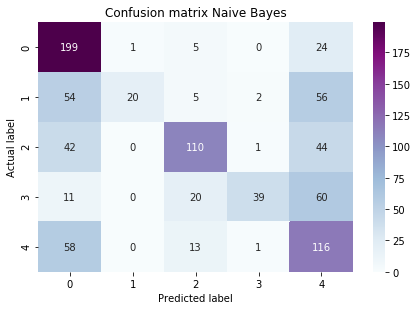

In [168]:
print(classification_report(y_test,multinomial_prediksi))
cm = confusion_matrix(y_test,prediksi)
class_names=[0,1,2,3,4] # name  of classes


# fig, ax = plt.subplots()
# plt.figure(figsize=(15,10))
# plt.subplot(231)
tick_marks = [[0,1,2,3,4]]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# # create heatmap
sb.heatmap(pd.DataFrame(cm), annot=True, cmap="BuPu" ,fmt='g')
# ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Naive Bayes', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# print(confusion_matrix(y_test,prediksi))

### Random Forest ###

              precision    recall  f1-score   support

       anger       0.57      0.81      0.67       229
        fear       0.94      0.58      0.72       137
       happy       0.62      0.55      0.58       197
        love       0.76      0.75      0.76       130
     sadness       0.48      0.42      0.45       188

    accuracy                           0.63       881
   macro avg       0.67      0.62      0.64       881
weighted avg       0.65      0.63      0.62       881



Text(0.5, 15.0, 'Predicted label')

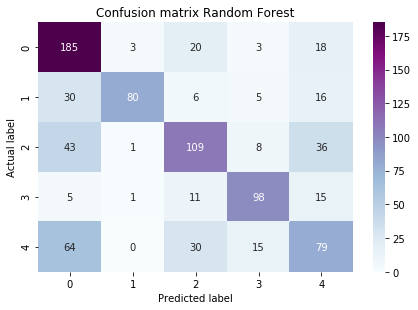

In [169]:
print(classification_report(y_test,RandomForest_prediksi))
cm = confusion_matrix(y_test,RandomForest_prediksi)
class_names=[0,1,2,3,4] # name  of classes


# fig, ax = plt.subplots()
# plt.figure(figsize=(15,10))
# plt.subplot(231)
tick_marks = [[0,1,2,3,4]]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# # create heatmap
sb.heatmap(pd.DataFrame(cm), annot=True, cmap="BuPu" ,fmt='g')
# ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Random Forest', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# print(confusion_matrix(y_test,prediksi))

### SVC ###

              precision    recall  f1-score   support

       anger       0.39      0.77      0.52       229
        fear       0.88      0.10      0.18       137
       happy       0.59      0.48      0.53       197
        love       0.91      0.32      0.48       130
     sadness       0.36      0.39      0.37       188

    accuracy                           0.46       881
   macro avg       0.63      0.41      0.42       881
weighted avg       0.58      0.46      0.43       881



Text(0.5, 15.0, 'Predicted label')

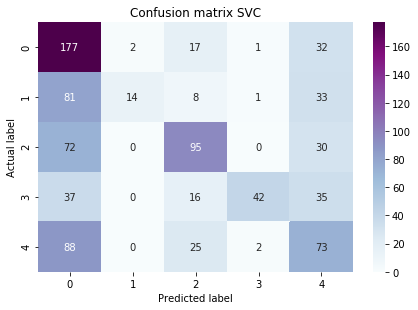

In [171]:
print(classification_report(y_test,SVC_prediksi))
cm = confusion_matrix(y_test,SVC_prediksi)
class_names=[0,1,2,3,4] # name  of classes


# fig, ax = plt.subplots()
# plt.figure(figsize=(15,10))
# plt.subplot(231)
tick_marks = [[0,1,2,3,4]]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# # create heatmap
sb.heatmap(pd.DataFrame(cm), annot=True, cmap="BuPu" ,fmt='g')
# ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix SVC', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# print(confusion_matrix(y_test,prediksi))

It seems **MultinomialNB** achieve highest accuracy compared to the other models.

Now trying to test the model using the **data** that model never seen before.

In [173]:
tweet = ["Soal 'mantan'.Jadi gimana? Masih mikirin mantan?"]
prediksi_test_cnb = multinomial_pipeline.predict(tweet)

In [174]:
prediksi_test_cnb

array(['sadness'], dtype='<U7')

In [175]:
multinomial_pipeline.predict_proba(tweet)

array([[0.27580546, 0.13678623, 0.02365294, 0.00707608, 0.55667929]])

### Create Joblib Model for Applications ###

In [178]:
import joblib

In [180]:
# joblib.dump(multinomial_pipeline, 'model_twitter')

['model_twitter']